# Aprendizaje de variedades

En este cuaderno veremos diferentes técnicas de aprendizaje de variedades (*manifold learning* o *embeddings*)

El objetivo es lograr una representación vectorial de los ejemplos en una dimensión $d\ll D$ (en este cuaderno $d=2$) de tal modo que, a nivel local, se preserven las propiedades que tienen los ejemplos en su dimensión original $D$.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2024, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2024, URJC (Spain)

    alfredo.cuesta@urjc.es

## 0. Imports, cargado de datos y selección de características

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE


file_path = "../datasets/0vs1/"
file_name = "setX_0vs1.csv"
X_init = pd.read_csv(file_path+file_name, sep=';', header=None, dtype=int)
file_name = "setY_0vs1.csv"
Y_init = pd.read_csv(file_path+file_name, sep=';', header=None, dtype=int)
Y_color = Y_init.replace([1,0],['r','b']).values.ravel() #<- this is for plotting

#scaler = MinMaxScaler().set_output(transform='pandas')
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(X_init)
X_scl = scaler.transform(X_init)

cols_idx = range(0,783)#[2,4,6,8] #<-- select columns (or just put the names in 'cols' and comment this line)
cols  = X_scl.columns[cols_idx] 
X_sel = X_scl[cols] 

X_sel.shape

(1000, 783)

## 1. Locally Linear Embedding (LLE)

In [25]:
n_components = 2
n_neighbors = 30
random_state = 1234
max_iter = 100

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components,
                            max_iter=max_iter, random_state=random_state)
lle.set_output(transform='pandas')
lle.fit(X_sel)
X_lle = lle.transform(X_sel)
col_names = ['LLE%d'%(col+1) for col in range(n_components)]
X_lle.columns=col_names

X_lle.head()

,LLE1,LLE2
0,0.049065,-0.073346
1,0.017306,0.037887
2,0.040492,-0.033099
3,-0.052951,-0.016686
4,0.002539,0.072093


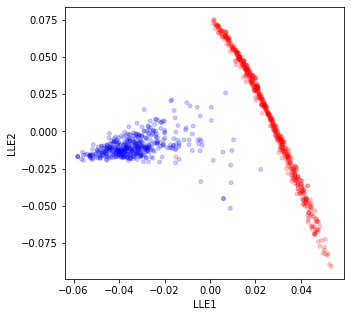

In [26]:
# sp_scl = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',  # <- Genera una matriz de emparejamientos.
#                                    hist_kwds={'bins': 20}, s=60, alpha=.1)         #    Si hay muchas variables no se ve nada.
sp_lle = X_lle.plot.scatter(x='LLE1',  y='LLE2',  c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.2)

## 2. Isomap

In [37]:
n_components = 2
n_neighbors = 10
metric = 'cosine' #<-- 'cityblock', 'cosine', 'euclidean' , 'haversine' , 'l1' , 'l2' , 'manhattan' , 'nan_euclidean' 
max_iter = 500

isom = Isomap(n_neighbors=n_neighbors, n_components=n_components, metric=metric,
              max_iter=max_iter)
isom.set_output(transform='pandas')
isom.fit(X_sel)
X_isom = isom.transform(X_sel)
col_names = ['isomap%d'%(col+1) for col in range(n_components)]
X_isom.columns=col_names

X_isom.head()

,isomap1,isomap2
0,-0.991018,-0.704578
1,-0.850889,0.502003
2,-0.968896,-0.514256
3,1.659875,0.362120
4,-1.077744,1.419281


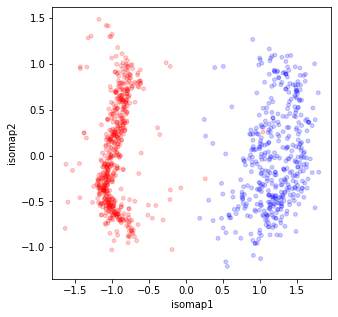

In [38]:
#sp_scl = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
#                                    hist_kwds={'bins': 20}, s=60, alpha=.1)
sp_iso = X_isom.plot.scatter(x='isomap1',  y='isomap2',  c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.2)

## 3. T-SNE

In [45]:
n_components = 2
perplexity = 20
metric = 'l1' #<-- 'cityblock', 'cosine', 'euclidean' , 'haversine' , 'l1' , 'l2' , 'manhattan' , 'nan_euclidean' 
random_state = 1234
max_iter = 500
n_iter_without_progress=150

tsn = TSNE(perplexity=perplexity, n_components=n_components, metric=metric,
           max_iter = max_iter, n_iter_without_progress=n_iter_without_progress, random_state=random_state)
tsn.set_output(transform='pandas')
X_tsn = tsn.fit_transform(X_sel)
col_names = ['tsne%d'%(col+1) for col in range(n_components)]
X_tsn.columns=col_names

X_tsn.head()

,tsne1,tsne2
0,4.109234,34.984299
1,24.349239,-10.029689
2,9.485498,31.565680
3,-32.408092,-7.157171
4,14.837416,-33.604145


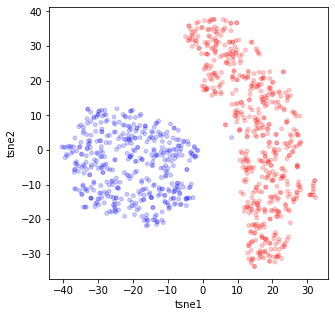

In [46]:
#sp_scl = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
#                                    hist_kwds={'bins': 20}, s=60, alpha=.1)
X_tsn = X_tsn.plot.scatter(x='tsne1',  y='tsne2',  c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.2)